Matplotlib is building the font cache; this may take a moment.


First 5 rows of the dataset:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37345

<ipython-input-1-88f652d6d9ff>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanicdata['Age'].fillna(titanicdata['Age'].mean(), inplace=True)
<ipython-input-1-88f652d6d9ff>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac


Missing values after filling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64


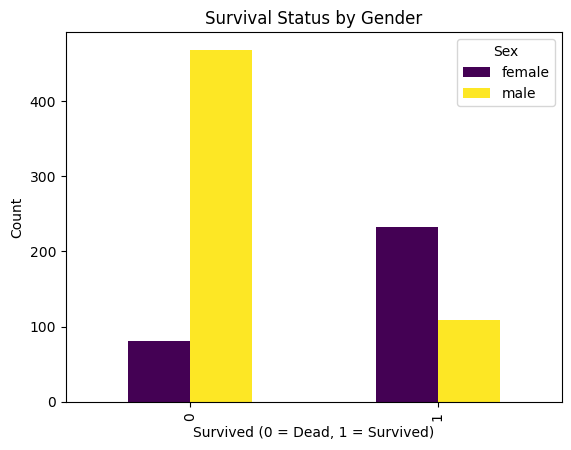

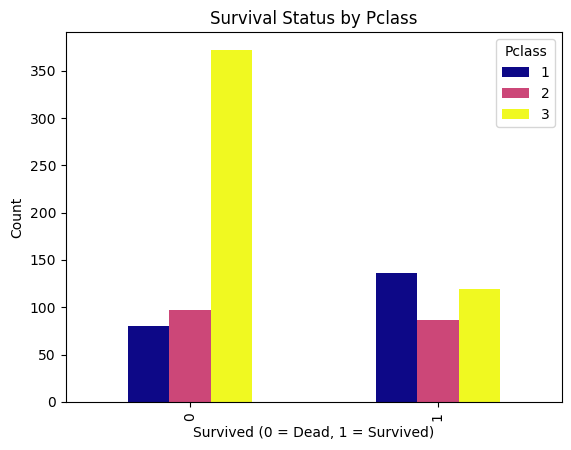


Dataframe after creating 'AgeClass':
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket     Fare    Cabin Embarked AgeClass  
0         A/5 21171   7.2500  Unknown        S        1  
1          PC 17599  71.2833      C85        C        3  
2  STON/O2. 3101282   7.9250  Unknown        S        1  
3            113803  53.1000     C123      

<ipython-input-1-88f652d6d9ff>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ageclass_counts = titanicdata.groupby(['Survived', 'AgeClass']).size().unstack()


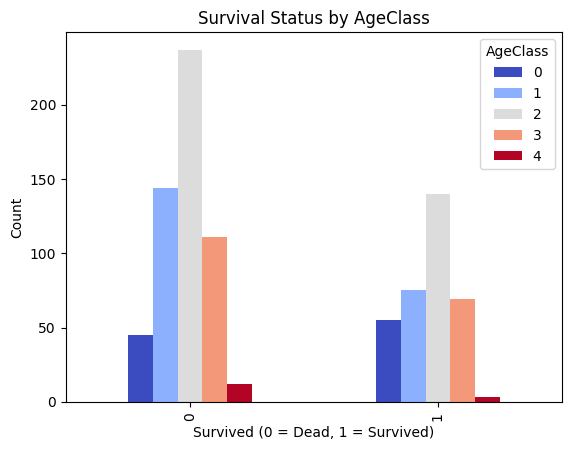

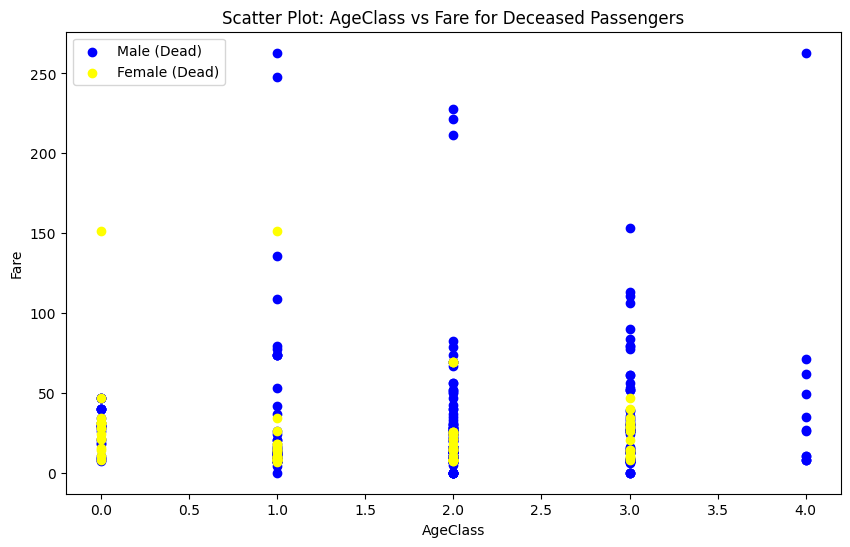

In [1]:
#Project 1

import pandas as pd
import matplotlib.pyplot as plt

#1
#url="https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv"
url = "titanic (1).csv"
titanicdata = pd.read_csv(url)
print("First 5 rows of the dataset:\n", titanicdata.head())


#2
missing_values = titanicdata.isnull().sum()
print("\nColumns with missing values:\n", missing_values[missing_values > 0])


#3
titanicdata['Age'].fillna(titanicdata['Age'].mean(), inplace=True)
titanicdata['Cabin'].fillna('Unknown', inplace=True)
print("\nMissing values after filling:\n", titanicdata.isnull().sum())

#4
survival_counts = titanicdata.groupby(['Survived', 'Sex']).size().unstack()
survival_counts.plot(kind='bar', stacked=False, colormap='viridis')
plt.title('Survival Status by Gender')
plt.xlabel('Survived (0 = Dead, 1 = Survived)')
plt.ylabel('Count')
plt.show()

#5
pclass_counts = titanicdata.groupby(['Survived', 'Pclass']).size().unstack()
pclass_counts.plot(kind='bar', stacked=False, colormap='plasma')
plt.title('Survival Status by Pclass')
plt.xlabel('Survived (0 = Dead, 1 = Survived)')
plt.ylabel('Count')
plt.show()

#6
titanicdata['AgeClass'] = pd.cut(titanicdata['Age'], bins=[0, 16, 26, 36, 62, 100], labels=[0, 1, 2, 3, 4])

#7
titanicdata.drop('Age', axis=1, inplace=True)
print("\nDataframe after creating 'AgeClass':\n", titanicdata.head())

#8
ageclass_counts = titanicdata.groupby(['Survived', 'AgeClass']).size().unstack()
ageclass_counts.plot(kind='bar', stacked=False, colormap='coolwarm')
plt.title('Survival Status by AgeClass')
plt.xlabel('Survived (0 = Dead, 1 = Survived)')
plt.ylabel('Count')
plt.show()

#Assignment

# Scatter plot for dead passengers (Survived = 0)
deceased = titanicdata[titanicdata['Survived'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(deceased[deceased['Sex'] == 'male']['AgeClass'], deceased[deceased['Sex'] == 'male']['Fare'], 
            color='blue', label='Male (Dead)')
plt.scatter(deceased[deceased['Sex'] == 'female']['AgeClass'], deceased[deceased['Sex'] == 'female']['Fare'], 
            color='yellow', label='Female (Dead)')

plt.title('Scatter Plot: AgeClass vs Fare for Deceased Passengers')
plt.xlabel('AgeClass')
plt.ylabel('Fare')
plt.legend()
plt.show()



In [4]:
reg=43
Question=reg%6
print(Question)

#Assignment question 1

import matplotlib.pyplot as plt

url = "titanic (1).csv"
titanicdata = pd.read_csv(url)
print("First 5 rows of the dataset:\n", titanicdata.head())

male_survivors = titanicdata[(titanicdata['Survived'] == 1) & (titanicdata['Sex'] == 'male')]
female_survivors = titanicdata[(titanicdata['Survived'] == 1) & (titanicdata['Sex'] == 'female')]

male_survivors = male_survivors.dropna(subset=['Age'])
female_survivors = female_survivors.dropna(subset=['Age'])

print(male_survivors)
print(female_survivors)

1
First 5 rows of the dataset:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373

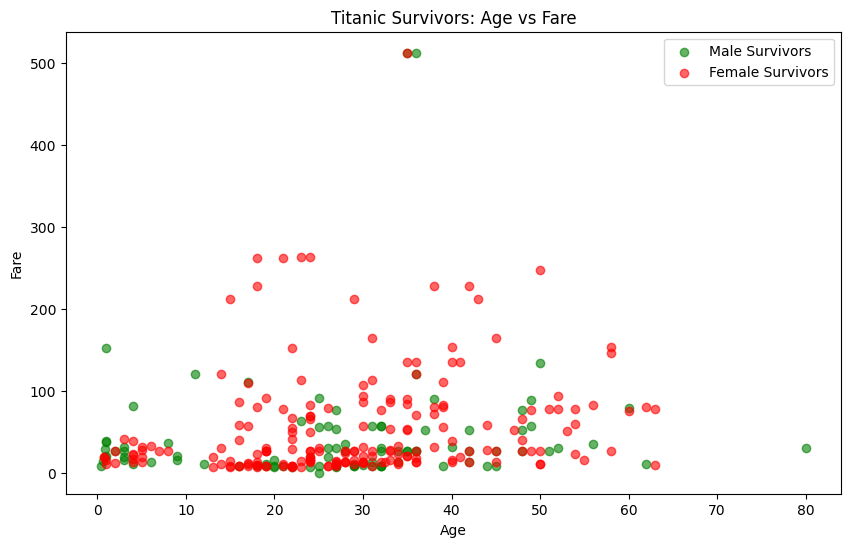

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(male_survivors['Age'], male_survivors['Fare'], color='green', label='Male Survivors', alpha=0.6)
plt.scatter(female_survivors['Age'], female_survivors['Fare'], color='red', label='Female Survivors', alpha=0.6)

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Titanic Survivors: Age vs Fare')
plt.legend()



plt.show()